# Model benchmarking

In [2]:
import numpy as np

from src.model.gwr import GWR
from src.kernel.gwr_kernel import GwrKernel
from src.optimizer.gwr_optimizer import GwrOptimizer
from src.log.gwr_logger import GwrLogger
from src.dataset.simulated_spatial_dataset import SimulatedSpatialDataset

Prepare simulated dataset for benchmarking.

In [3]:
field_size = 40
dataset = SimulatedSpatialDataset(field_size=field_size)
[b0, b1, b2] = dataset.generate_processes()
[X, y] = dataset.fit_y(b0, b1, b2)

Ground truth processes

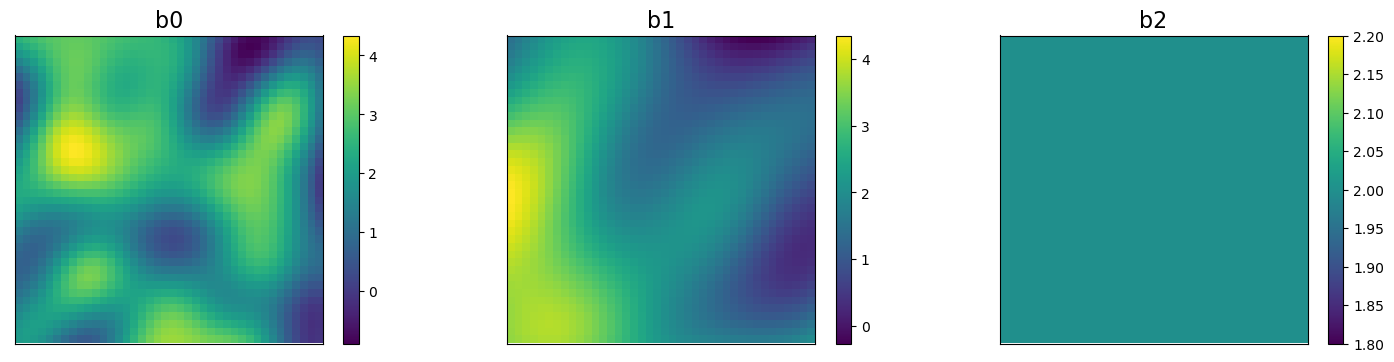

In [4]:
dataset.plot(
    b=np.vstack([b0, b1, b2]),
    sub_title=['b0', 'b1', 'b2'],
    size=field_size
)

Golden section based GWR bandwidth optimization

{'2025-04-13 11:22:58': 'GWR : GWR model is initialized.'}
{'2025-04-13 11:22:58': 'GwrOptimizer : Bandwidth 107.29490168751578, AICc 1267.3070509838117, R2 0.9926983416609955'}
{'2025-04-13 11:22:59': 'GwrOptimizer : Bandwidth 142.7050983124842, AICc 1839.0243853259065, R2 0.9890892961518937'}
{'2025-04-13 11:22:59': 'GwrOptimizer : Bandwidth 85.41019662496845, AICc 785.2806116407611, R2 0.9948872738203542'}
{'2025-04-13 11:22:59': 'GwrOptimizer : Bandwidth 71.88470506254731, AICc 514.0709908334852, R2 0.9957762399632628'}
{'2025-04-13 11:23:00': 'GwrOptimizer : Bandwidth 63.52549156242114, AICc 240.38950337090222, R2 0.9966397529443103'}
{'2025-04-13 11:23:00': 'GwrOptimizer : Bandwidth 58.35921350012618, AICc 116.23913234543173, R2 0.9969894271607627'}
{'2025-04-13 11:23:00': 'GwrOptimizer : Bandwidth 55.16627806229496, AICc 15.787827031374903, R2 0.9972362175799571'}
{'2025-04-13 11:23:01': 'GwrOptimizer : Bandwidth 53.192935437831224, AICc -45.088399503482464, R2 0.997353056617643

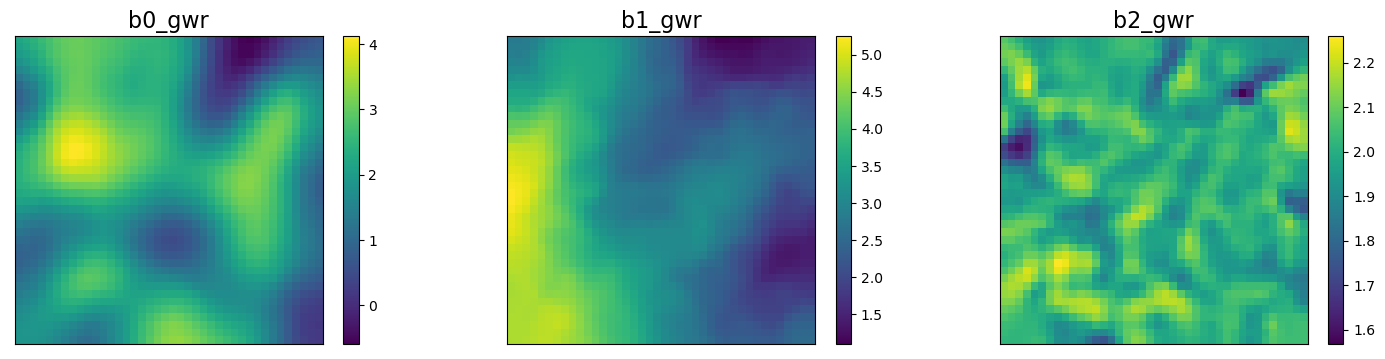

In [5]:
logger = GwrLogger()
kernel = GwrKernel(dataset, 'bisquare')
gwr = GWR(dataset, kernel, logger)
optimizer = GwrOptimizer(gwr, kernel, logger)
optimal_bandwidth = optimizer.optimize()

[b0_gwr, b1_gwr, b2_gwr] = [gwr.betas[:, 0], gwr.betas[:, 1], gwr.betas[:, 2]]

dataset.plot(
    b=np.vstack([b0_gwr, b1_gwr, b2_gwr]),
    sub_title=['b0_gwr', 'b1_gwr', 'b2_gwr'],
    size=field_size
)